In [1]:
import scanpy as sc
import pandas as pd 
import numpy as np
import sys
import matplotlib.pyplot as plt
import gc
import anndata
import glob
from multiprocessing import Pool
import os
from sklearn import metrics
import matplotlib.pyplot as plt
from adjustText import adjust_text

/home/workspace/Aux_Envir/Python_BRI_Figures/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/workspace/Aux_Envir/Python_BRI_Figures/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/workspace/Aux_Envir/Python_BRI_Figures/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/workspace/Aux_Envir/Python_BRI_Figures/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/workspace/Aux_Envir/Python_BRI_Figures/lib/python3.11/site-p

In [5]:
def gen_mpl_labels(adata, groupby, exclude=(), ax=None, adjust_kwargs=None, text_kwargs=None, offset=(0.05, 0.05)):
    if adjust_kwargs is None:
        adjust_kwargs = {
            "arrowprops": {"arrowstyle": "--->", "color": 'r'}, 
            "expand_points": (1.2, 1.2), 
            "force_points": 0.5
        }
    if text_kwargs is None:
        text_kwargs = {}

    highest_density_points = {}

    for g, g_idx in adata.obs.groupby(groupby).groups.items():
        if g in exclude:
            continue
        points = adata[g_idx].obsm["X_umap"]
        hist, xedges, yedges = np.histogram2d(points[:, 0], points[:, 1], bins=[50, 50])
        max_bin = np.unravel_index(np.argmax(hist), hist.shape)
        highest_density_point = [
            (xedges[max_bin[0]] + xedges[max_bin[0]+1])/2 + offset[0], 
            (yedges[max_bin[1]] + yedges[max_bin[1]+1])/2 + offset[1]
        ]
        highest_density_points[g] = highest_density_point

    if ax is None:
        ax = plt.gca()

    texts = [
        ax.text(x=x, y=y, s=k, **text_kwargs) for k, (x, y) in highest_density_points.items()
    ]

    adjust_text(texts, **adjust_kwargs)

In [2]:
adata=sc.read_h5ad("dataset/08984b3c-3189-4732-be22-62f1fe8f15a4.h5ad")

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/tmp/ipykernel_833/3244005820.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for g, g_idx in adata.obs.groupby(groupby).groups.items():


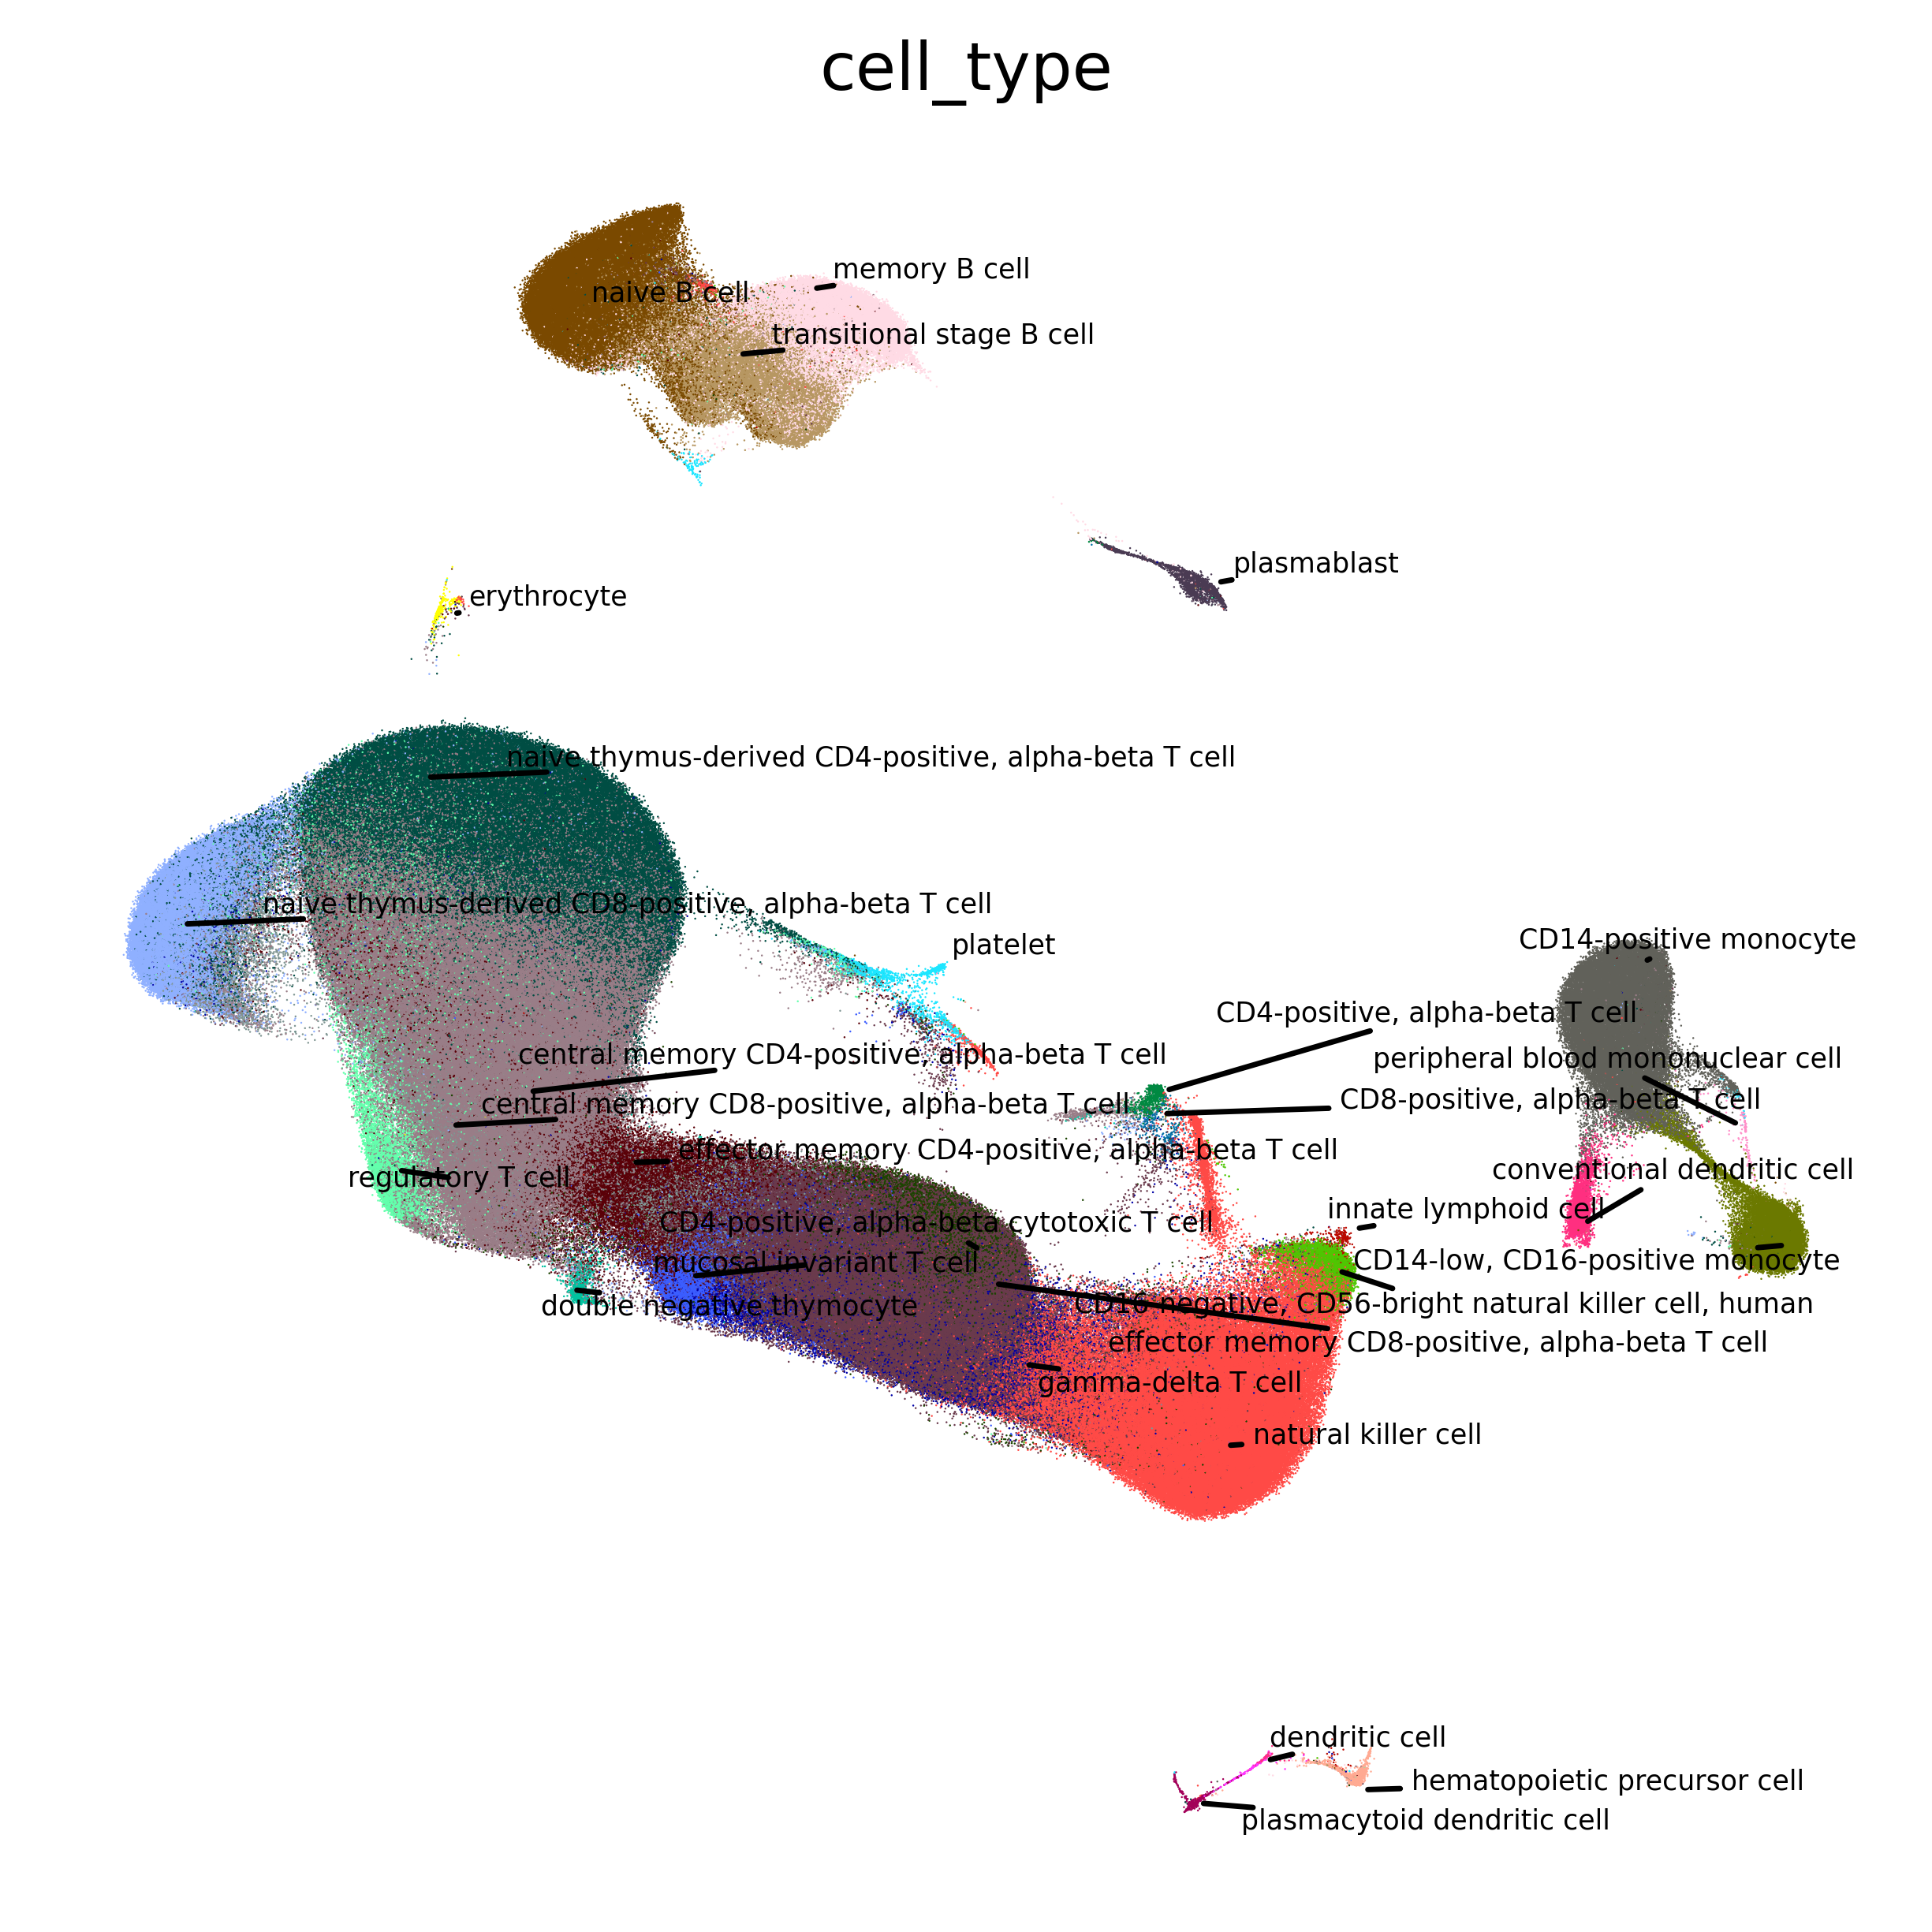

In [7]:
with plt.rc_context({"figure.figsize": (5, 5), "figure.dpi": 500, "figure.frameon": False}):
    ax=sc.pl.umap(adata, color=['cell_type'], size=0.5,show=False,legend_loc=None,ncols=1,frameon=False)
    gen_mpl_labels(
        adata,
        "cell_type",
        exclude=(""),  
        ax=ax,
        adjust_kwargs=dict(arrowprops=dict(arrowstyle='-', color='black')),
        text_kwargs=dict(fontsize=5),)
    fig = ax.get_figure()
    fig.tight_layout()